# Import Libraries

In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Spesific to Clustering
from sklearn.cluster import KMeans
import folium

from tqdm import tqdm # makes your loops show a progess bar

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

from collections import defaultdict

# import hdbscan # HDBSCAN is not available in sklearn.
import folium # Used for plotting geo-spatial data on a map.

# Read the dataset

In [2]:
data = pd.read_csv("/content/sample_data/NY-House-Dataset.csv")
df = pd.DataFrame(data)

# Refer the information about dataset

**View information of the CSV data**

In [4]:
data['PRICE']

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4796       599000
4797       245000
4798      1275000
4799       598125
4800       349000
Name: PRICE, Length: 4801, dtype: int64

In [3]:
df['PRICE']

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4796       599000
4797       245000
4798      1275000
4799       598125
4800       349000
Name: PRICE, Length: 4801, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


**View datatypes**

In [ ]:
df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

**View the first 10 rows of the CSV file**

In [ ]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


**shape of the data**

In [ ]:
df.shape

(4801, 17)

**Boxplot of all data**

<Axes: >

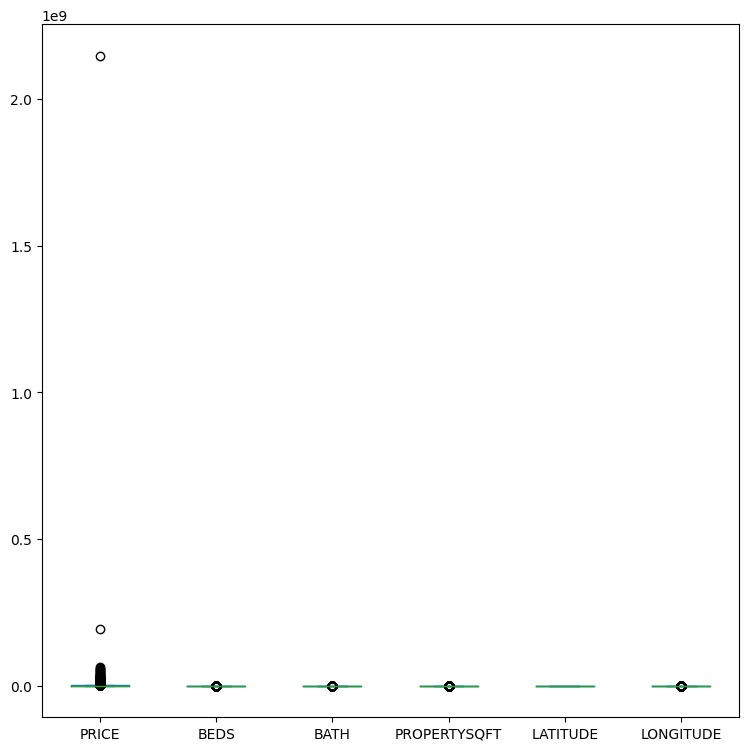

In [ ]:
data.plot(kind="box", figsize=(9,9))

**Data Correlation**

In [ ]:
df[['PRICE','BEDS','PROPERTYSQFT','LATITUDE','LONGITUDE']].corr()

,PRICE,BEDS,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.052189,0.110889,-0.020392,-0.054273
BEDS,0.052189,1.000000,0.420503,-0.060933,-0.004529
PROPERTYSQFT,0.110889,0.420503,1.000000,0.023413,-0.037308
LATITUDE,-0.020392,-0.060933,0.023413,1.000000,0.513969
LONGITUDE,-0.054273,-0.004529,-0.037308,0.513969,1.000000


**Correlation heatmap**

<Axes: >

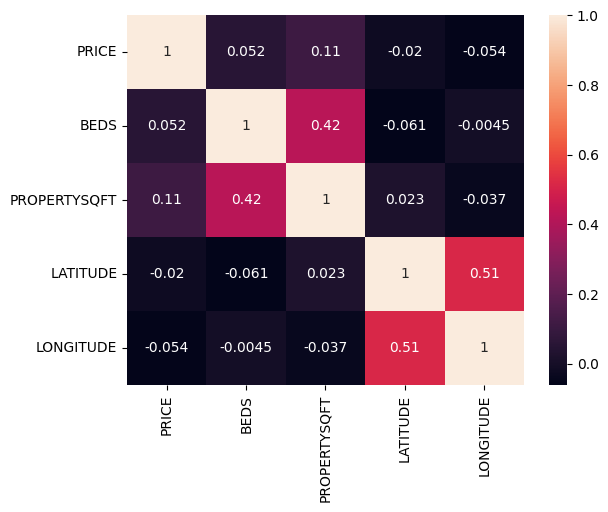

In [ ]:
sns.heatmap(data[['PRICE','BEDS','PROPERTYSQFT','LATITUDE','LONGITUDE']].corr(),annot=True)

###Information exploring related to Longidude and Latitude of the dataset

#### Descriptive analysis

##### **Latitude**

**Data of Latitude**

In [ ]:
data['LATITUDE']

0       40.761255
1       40.766393
2       40.541805
3       40.761398
4       40.767224
          ...    
4796    40.774350
4797    40.732538
4798    40.745882
4799    40.742770
4800    40.579147
Name: LATITUDE, Length: 4587, dtype: float64

In [ ]:
# min of latitude
min(data['LATITUDE'])

40.4995462

**Boxplot for Latitude**

<Axes: >

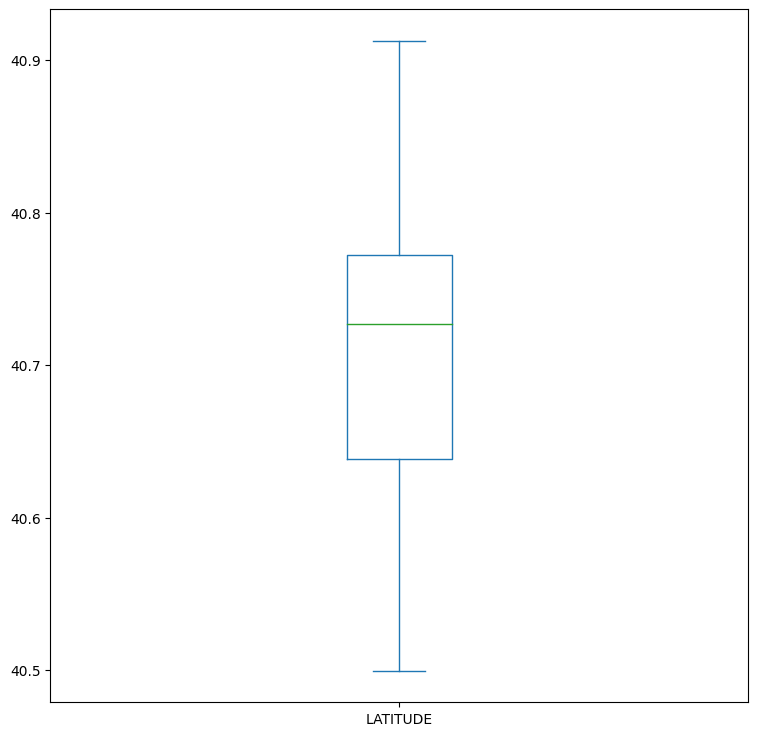

In [ ]:
data["LATITUDE"].plot(kind="box", figsize=(9,9))

**variance of the latitude**

In [ ]:
va=statistics.variance(data['LATITUDE'])
print(va)

0.007697910388908367


**25th and 75th percentiles of latitude**

In [ ]:
q1=np.percentile(data['LATITUDE'],25)
print(q1)
q3=np.percentile(data['LATITUDE'],75)
print(q3)

40.638587650000005
40.7719126


**Check skewness of latitude**

In [ ]:
from scipy.stats import skew
print(skew(data['LATITUDE']))

-0.08749336588841225


<ipython-input-98-f1a9bb12f9b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(data["LATITUDE"],label="Skewness: %.2f"%(data["LATITUDE"].skew()) )


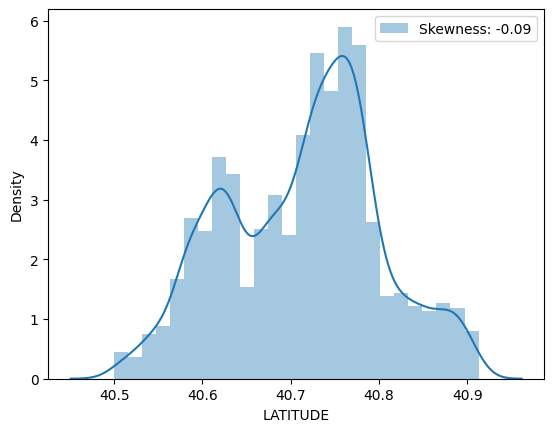

In [ ]:
data["LATITUDE"].fillna(data["LATITUDE"].median(),inplace=True)
t=sns.distplot(data["LATITUDE"],label="Skewness: %.2f"%(data["LATITUDE"].skew()) )
t.legend()

**Plotting Latitude data**

<Axes: ylabel='Frequency'>

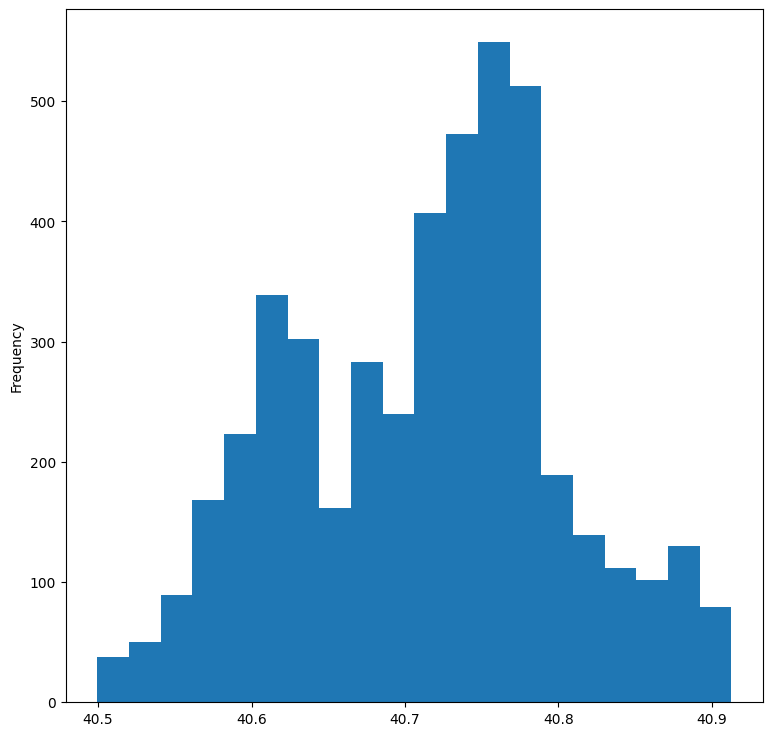

In [ ]:
data["LATITUDE"].plot(kind="hist", figsize=(9,9),bins=20)

**Boxplot for latitude**

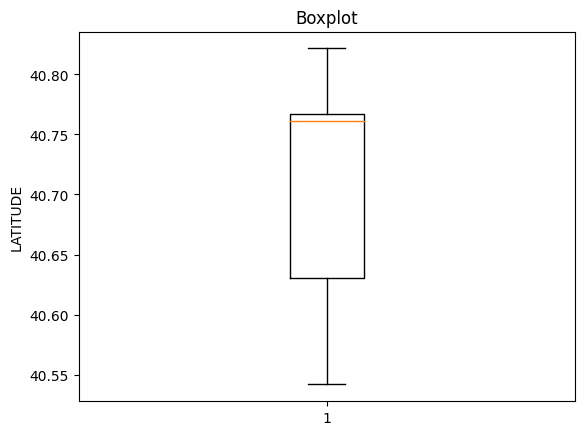

In [ ]:
plt.boxplot(df['LATITUDE'].head(10))
plt.title('Boxplot')
plt.ylabel('LATITUDE')
plt.show()

**Displot for latitude**

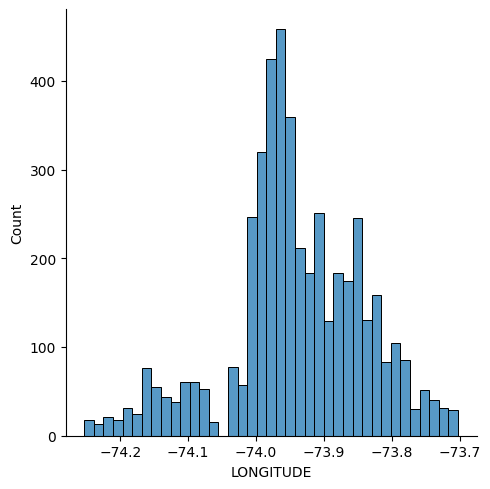

In [ ]:
sns.displot(data['LONGITUDE'])

##### **Logitude**

**Data of Longitude**

In [ ]:
data['LONGITUDE']

0      -73.974483
1      -73.980991
2      -74.196109
3      -73.974613
4      -73.969856
          ...    
4796   -73.955879
4797   -73.860152
4798   -74.003398
4799   -73.872752
4800   -73.970949
Name: LONGITUDE, Length: 4587, dtype: float64

In [ ]:
# min of latitude
min(data['LONGITUDE'])

-74.2530332

**Boxplot for Longitude**

<Axes: >

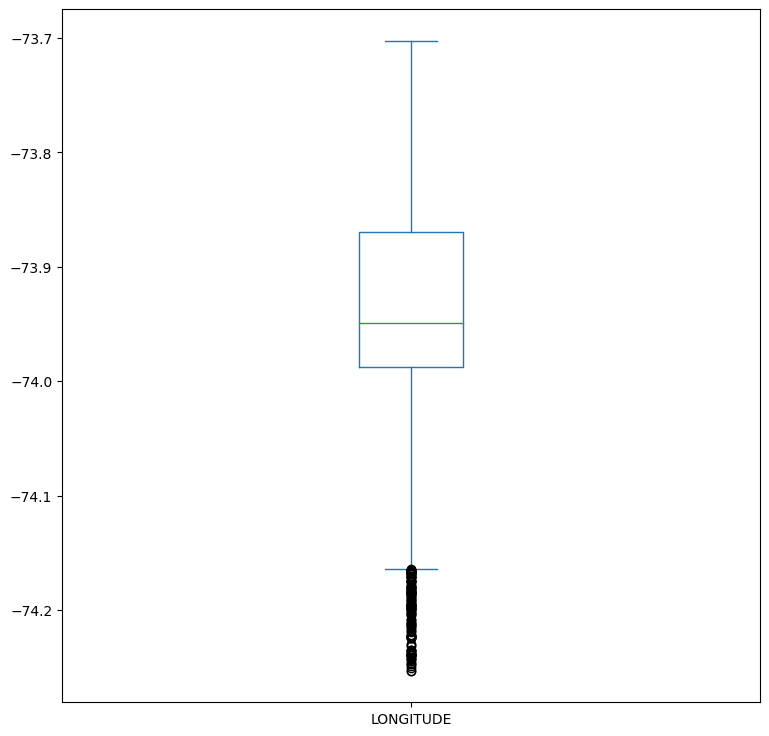

In [ ]:
data["LONGITUDE"].plot(kind="box", figsize=(9,9))

**variance of the Longitude**

In [ ]:
sd=statistics.stdev(data['LONGITUDE'])
print(sd)

0.10127599845846659


**25th and 75th percentiles of Longitude**

In [ ]:
q1=np.percentile(data['LONGITUDE'],25)
print(q1)
q3=np.percentile(data['LONGITUDE'],75)
print(q3)

-73.98742
-73.8694553


**Check skewness of Longitude**

In [ ]:
from scipy.stats import skew
print(skew(data['LONGITUDE']))

-0.3919587591897195


<ipython-input-109-9097ffe6b8d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(data["LONGITUDE"],label="Skewness: %.2f"%(data["LONGITUDE"].skew()) )


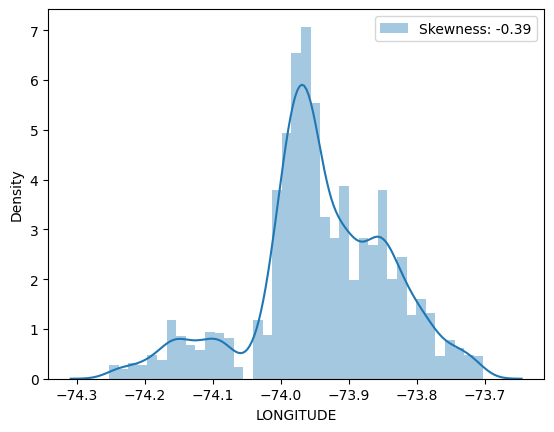

In [ ]:
data["LONGITUDE"].fillna(data["LONGITUDE"].median(),inplace=True)
t=sns.distplot(data["LONGITUDE"],label="Skewness: %.2f"%(data["LONGITUDE"].skew()) )
t.legend()

**Plotting Longitude data**

<Axes: ylabel='Frequency'>

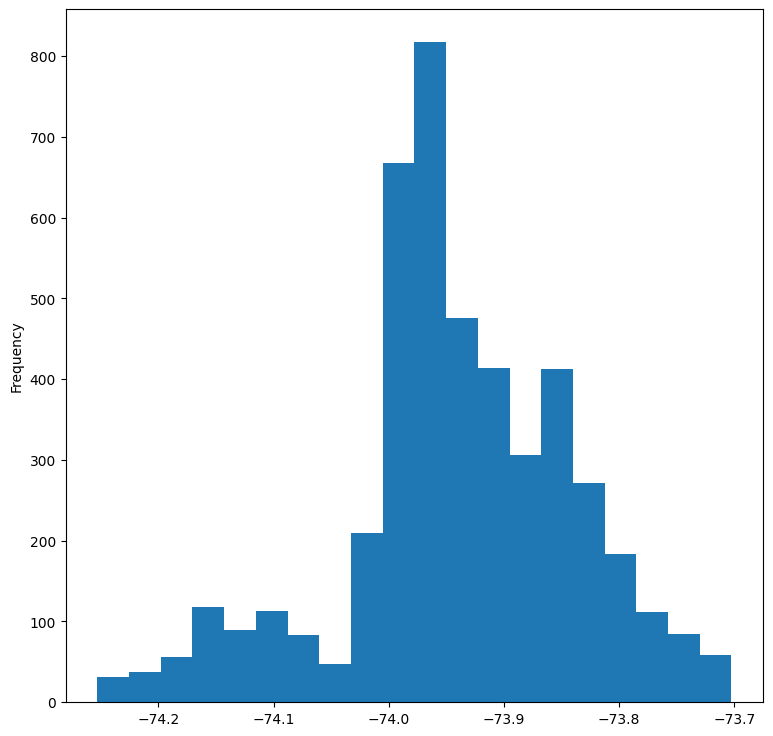

In [ ]:
data["LONGITUDE"].plot(kind="hist", figsize=(9,9),bins=20)

**Boxplot for Longitude**

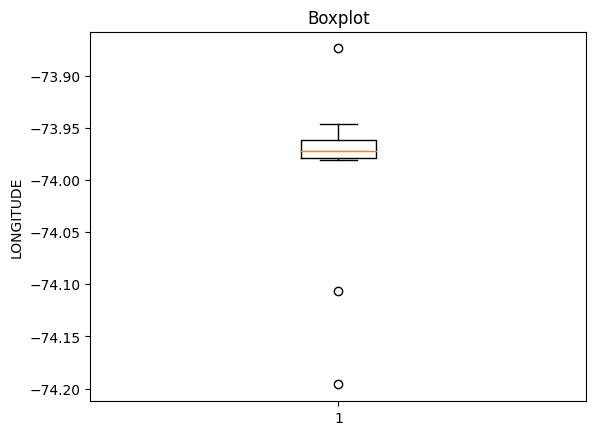

In [ ]:
plt.boxplot(df['LONGITUDE'].head(10))
plt.title('Boxplot')
plt.ylabel('LONGITUDE')
plt.show()

**Displot for Longitude**

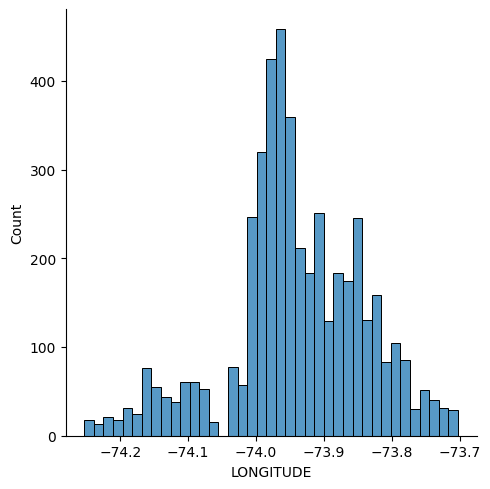

In [ ]:
sns.displot(data['LONGITUDE'])

# Preprocessing

## Cleaning

**Null or missing values**

In [ ]:
data.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

**Handle duplicate values**

In [ ]:
# view duplicate values
data.duplicated().sum()

214

In [ ]:
#remove duplicate values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Integration

## Reduction

## Transformation

# Data Mining

## Clustering Related data mining

***Here it performe location based clustering using given logitudes and latitudes***

### Descriptive Analysis

**Five-Number Summery of Latitude**

In [ ]:
data['LATITUDE'].describe()

count    4587.000000
mean       40.713932
std         0.087738
min        40.499546
25%        40.638588
50%        40.726667
75%        40.771913
max        40.912729
Name: LATITUDE, dtype: float64

**Five-Number Summery of Longitude**

In [ ]:
data['LONGITUDE'].describe()

count    4587.000000
mean      -73.941584
std         0.101276
min       -74.253033
25%       -73.987420
50%       -73.949116
75%       -73.869455
max       -73.702450
Name: LONGITUDE, dtype: float64

**Scatter Plot**

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

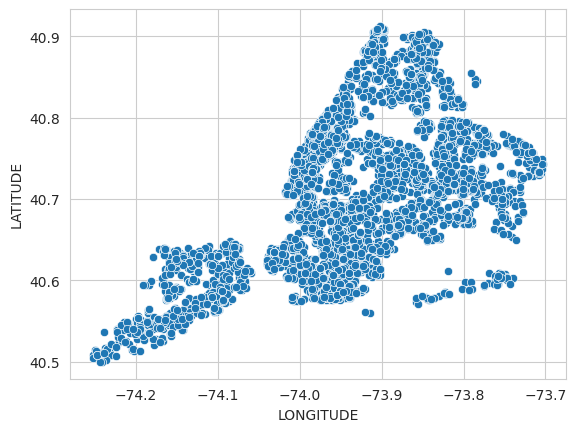

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE')

**Histogram for Latitude**

<Axes: xlabel='LATITUDE', ylabel='Count'>

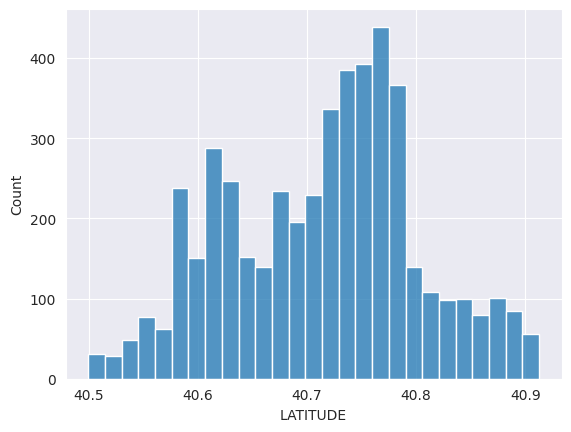

In [ ]:
sns.set_style('darkgrid')
sns.histplot(data=df, x='LATITUDE')

**Histogram for Logitude**

<Axes: xlabel='LONGITUDE', ylabel='Count'>

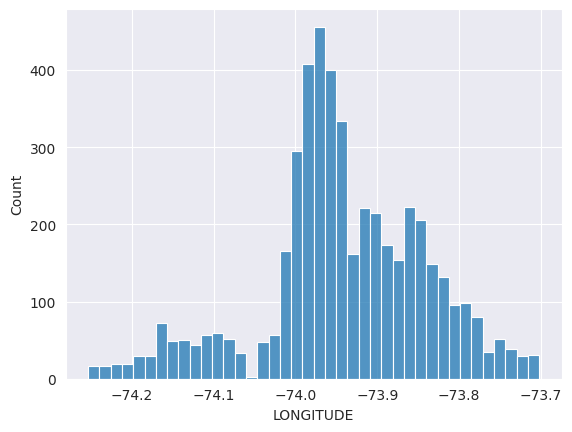

In [ ]:
sns.set_style('darkgrid')
sns.histplot(data=df, x='LONGITUDE')


**LinePlot for both Longitude and Latitude**

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

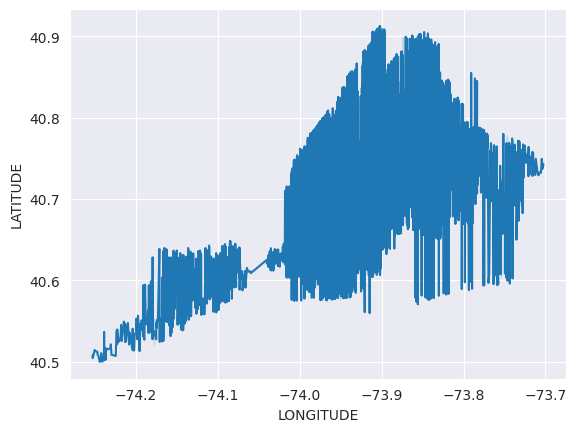

In [ ]:
sns.lineplot(x="LONGITUDE", y="LATITUDE", data=df)

### Predictive Analysis

***Clustering does not discuss about any Predictive Analysis unless we dont predict anything using clusters.***

### **DATA CLUSTERING**

**View data**

In [ ]:
x = df[["LATITUDE", "LONGITUDE"]]
x.head()

,LATITUDE,LONGITUDE
0,40.761255,-73.974483
1,40.766393,-73.980991
2,40.541805,-74.196109
3,40.761398,-73.974613
4,40.767224,-73.969856


**find the optimal number of clusters by iterating from 1 to 10**

In [ ]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Draw Elow method**

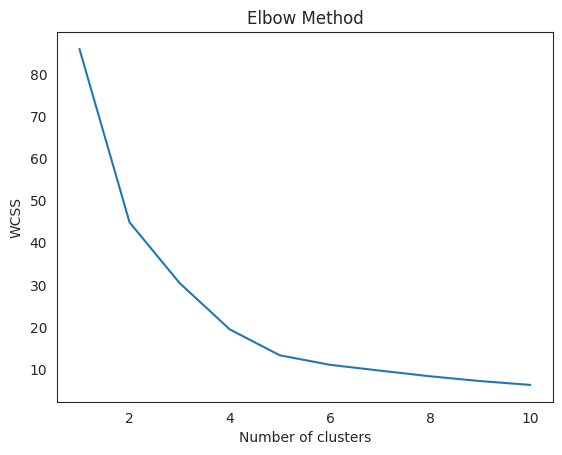

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

**Clustering**

In [ ]:
# considered 5 clusters

model = KMeans(n_clusters=5)
y_kmeans = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['y'] = y_kmeans

**Plot the data with clusters**

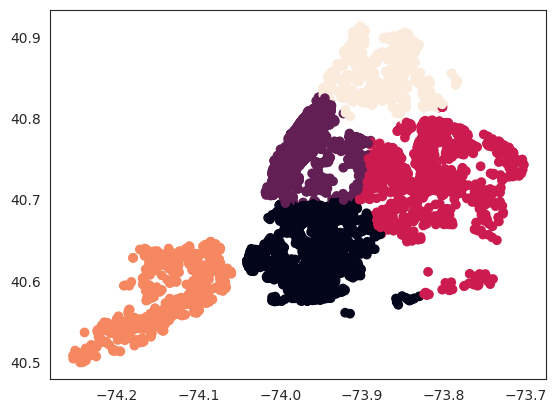

In [ ]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['y'])

In [ ]:
df = df[:2000]

cluster1 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 0].values.tolist()
cluster2 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 1].values.tolist()
cluster3 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 2].values.tolist()
cluster4 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 3].values.tolist()
cluster5 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 4].values.tolist()

**Get the Map**

In [ ]:
map = folium.Map(location=[40.4995462, -74.2530332], zoom_start=10,tiles = "openstreetmap")
map

**Clustered Data in the Map**

In [ ]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)

for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)

for i in cluster4:
    folium.CircleMarker(i, radius=2,color='yellow',fill_color='lightyellow').add_to(map)

for i in cluster5:
    folium.CircleMarker(i, radius=2,color='orange',fill_color='lightorange').add_to(map)

In [ ]:
map

***snippet generates a synthetic dataset X_blobs containing 1000 data points, organized into 5 clusters with two features each, using the make_blobs function from scikit-learn.***

In [ ]:
# Pre-defining different colors and a long list of it so it can be assigned to different clusters later.
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
        '#000075', '#808080']*10

In [ ]:
X_blobs, _ = make_blobs(n_samples = 1000, centers = 5, n_features = 2, random_state = 4, cluster_std = 0.5)

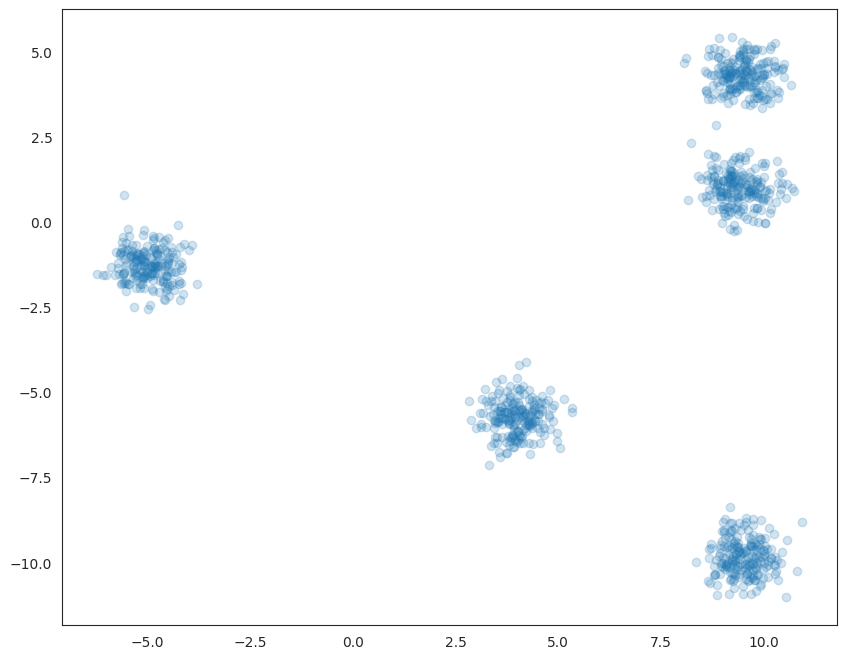

In [ ]:
plt.figure(figsize = [10,8])
plt.scatter(X_blobs[:,0], X_blobs[:,1], alpha = 0.2)